In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import yfinance as yf
import yahoo_fin

In [2]:
import tensorflow as tf
from tensorflow import keras

In [8]:
msft = yf.Ticker("MSFT")

In [9]:
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 221000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Client Access Licenses; GitHub that provides a collaboration platform and code hosting service for developers; Nuance provides healthcare and enterprise AI solutions; and Azure, a cloud platform. It also offers enterprise

In [13]:
hist = msft.history(period="5y", interval='1d')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-10-12 00:00:00-04:00,71.873821,72.625544,71.761068,72.465805,16876500,0.0,0
2017-10-13 00:00:00-04:00,72.907410,73.170517,72.625519,72.813446,15335700,0.0,0
2017-10-16 00:00:00-04:00,72.747684,73.114146,72.681908,72.963806,12380100,0.0,0
2017-10-17 00:00:00-04:00,72.794664,72.935613,72.587940,72.907417,16824000,0.0,0
2017-10-18 00:00:00-04:00,72.982593,73.151730,72.700702,72.926216,13300700,0.0,0
...,...,...,...,...,...,...,...
2022-10-06 00:00:00-04:00,247.929993,250.339996,246.080002,246.789993,20239900,0.0,0
2022-10-07 00:00:00-04:00,240.899994,241.320007,233.169998,234.240005,37732400,0.0,0
2022-10-10 00:00:00-04:00,233.050003,234.559998,226.729996,229.250000,29743600,0.0,0


In [14]:
msft.quarterly_financials

,2022-06-30,2022-03-31,2021-12-31,2021-09-30
Research Development,6849000000.0,6306000000.0,5758000000.0,5599000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,20487000000.0,20190000000.0,22515000000.0,20524000000.0
Minority Interest,None,None,None,None
Net Income,16740000000.0,16728000000.0,18765000000.0,20505000000.0
Selling General Administrative,8053000000.0,7075000000.0,6763000000.0,5834000000.0
Gross Profit,35436000000.0,33745000000.0,34768000000.0,31671000000.0
Ebit,20534000000.0,20364000000.0,22247000000.0,20238000000.0
Operating Income,20534000000.0,20364000000.0,22247000000.0,20238000000.0
Other Operating Expenses,None,None,None,None


In [15]:
msft.quarterly_earnings

,Revenue,Earnings
Quarter,,
3Q2021,45317000000,20505000000
4Q2021,51728000000,18765000000
1Q2022,49360000000,16728000000
2Q2022,51865000000,16740000000


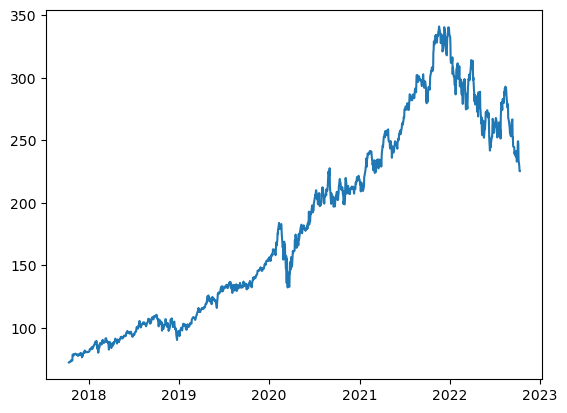

In [16]:
plt.plot(hist.index, hist['Close'])

In [17]:
df = hist.reset_index()['Close']
df.head()

0    72.465805
1    72.813446
2    72.963806
3    72.907417
4    72.926216
Name: Close, dtype: float64

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1, 1))
df1

array([[0.        ],
       [0.00129515],
       [0.00185533],
       ...,
       [0.58410678],
       [0.5698007 ],
       [0.56965165]])

In [59]:
train_size = int(len(df1)*0.65)
val_size = int(len(df1)*0.15)
test_size = len(df1) - train_size - val_size
train_data, val_data, test_data = df1[0:train_size, :], df1[train_size:train_size+val_size, :], df1[train_size+val_size:len(df1), :]
print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(818, 1)
(188, 1)
(253, 1)


In [60]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [61]:
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [76]:
model = tf.keras.Sequential((
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(60,1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1))
)
model.compile(loss='mean_squared_error', optimizer='adam')

In [77]:
history = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=40,
    validation_data=(X_val, y_val),
)

Epoch 1/40
48/48 [==============================] - 7s 56ms/step - loss: 0.0067 - val_loss: 0.0017
Epoch 2/40
48/48 [==============================] - 2s 37ms/step - loss: 4.0040e-04 - val_loss: 8.3759e-04
Epoch 3/40
48/48 [==============================] - 2s 38ms/step - loss: 4.2387e-04 - val_loss: 6.1445e-04
Epoch 4/40
48/48 [==============================] - 2s 38ms/step - loss: 4.2117e-04 - val_loss: 0.0011
Epoch 5/40
48/48 [==============================] - 2s 37ms/step - loss: 3.7739e-04 - val_loss: 5.8132e-04
Epoch 6/40
48/48 [==============================] - 2s 37ms/step - loss: 3.5483e-04 - val_loss: 7.8292e-04
Epoch 7/40
48/48 [==============================] - 2s 37ms/step - loss: 3.6745e-04 - val_loss: 7.3487e-04
Epoch 8/40
48/48 [==============================] - 2s 45ms/step - loss: 3.2599e-04 - val_loss: 0.0012
Epoch 9/40
48/48 [==============================] - 3s 60ms/step - loss: 3.2434e-04 - val_loss: 0.0018
Epoch 10/40
48/48 [==============================] - 3s 5

In [81]:
history2 = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=10,
    validation_data=(X_val, y_val),
)

Epoch 1/10
48/48 [==============================] - 2s 39ms/step - loss: 1.9126e-04 - val_loss: 0.0017
Epoch 2/10
48/48 [==============================] - 2s 37ms/step - loss: 2.6441e-04 - val_loss: 3.3879e-04
Epoch 3/10
48/48 [==============================] - 2s 38ms/step - loss: 1.8958e-04 - val_loss: 5.4048e-04
Epoch 4/10
48/48 [==============================] - 2s 37ms/step - loss: 1.6695e-04 - val_loss: 6.1151e-04
Epoch 5/10
48/48 [==============================] - 2s 37ms/step - loss: 1.5919e-04 - val_loss: 2.6686e-04
Epoch 6/10
48/48 [==============================] - 2s 37ms/step - loss: 1.4743e-04 - val_loss: 1.9065e-04
Epoch 7/10
48/48 [==============================] - 2s 45ms/step - loss: 1.9401e-04 - val_loss: 1.9150e-04
Epoch 8/10
48/48 [==============================] - 3s 61ms/step - loss: 1.5202e-04 - val_loss: 5.2830e-04
Epoch 9/10
48/48 [==============================] - 3s 61ms/step - loss: 1.5283e-04 - val_loss: 5.7889e-04
Epoch 10/10
48/48 [======================

In [82]:
y_preds = scaler.inverse_transform(model.predict(X_test))
y_preds[:5]

array([[309.63208],
       [303.81918],
       [302.10892],
       [302.66656],
       [304.26404]], dtype=float32)

In [83]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)),y_preds))
rmse

7.5207008549570284

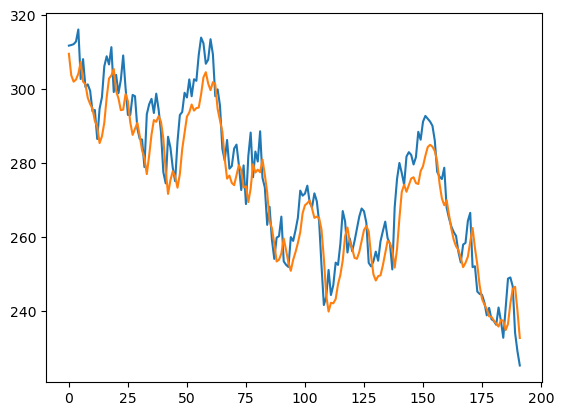

In [84]:
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)))
plt.plot(y_preds)